# Task 4: Location Based Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
file_path = r'C:\Users\manis\OneDrive\Desktop\Dataset .csv'
data = pd.read_csv(file_path)


In [4]:
# Check the columns of the dataset
print(data.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


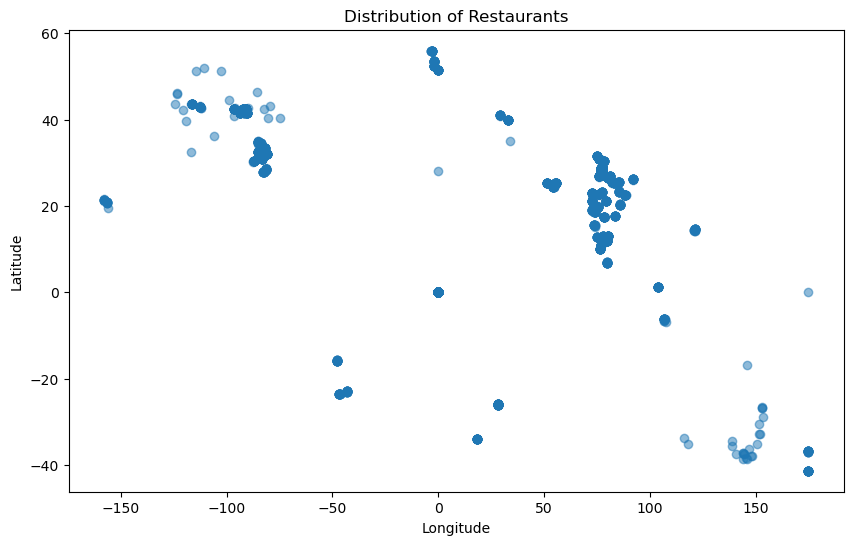

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Restaurants')
plt.show()


In [9]:
# Group by city and count the number of restaurants
city_restaurants = data.groupby('City')['Restaurant ID'].count().reset_index()
print(city_restaurants)


                City  Restaurant ID
0          Abu Dhabi             20
1               Agra             20
2          Ahmedabad             21
3             Albany             20
4          Allahabad             20
..               ...            ...
136          Weirton              1
137  Wellington City             20
138   Winchester Bay              1
139          Yorkton              1
140        ��stanbul             14

[141 rows x 2 columns]


In [24]:
color_mapping = {
    'Dark Green': 1,
    'Green': 2,
    'Yellow': 3,
    # Add mappings for other colors as needed
}

data['Rating color'] = data['Rating color'].map(color_mapping)


In [27]:
avg_ratings_by_city = data.groupby('City')['Rating color'].mean().reset_index()
print(avg_ratings_by_city)


                City  Rating color
0          Abu Dhabi           NaN
1               Agra           NaN
2          Ahmedabad           NaN
3             Albany           NaN
4          Allahabad           NaN
..               ...           ...
136          Weirton           NaN
137  Wellington City           NaN
138   Winchester Bay           NaN
139          Yorkton           NaN
140        ��stanbul           NaN

[141 rows x 2 columns]


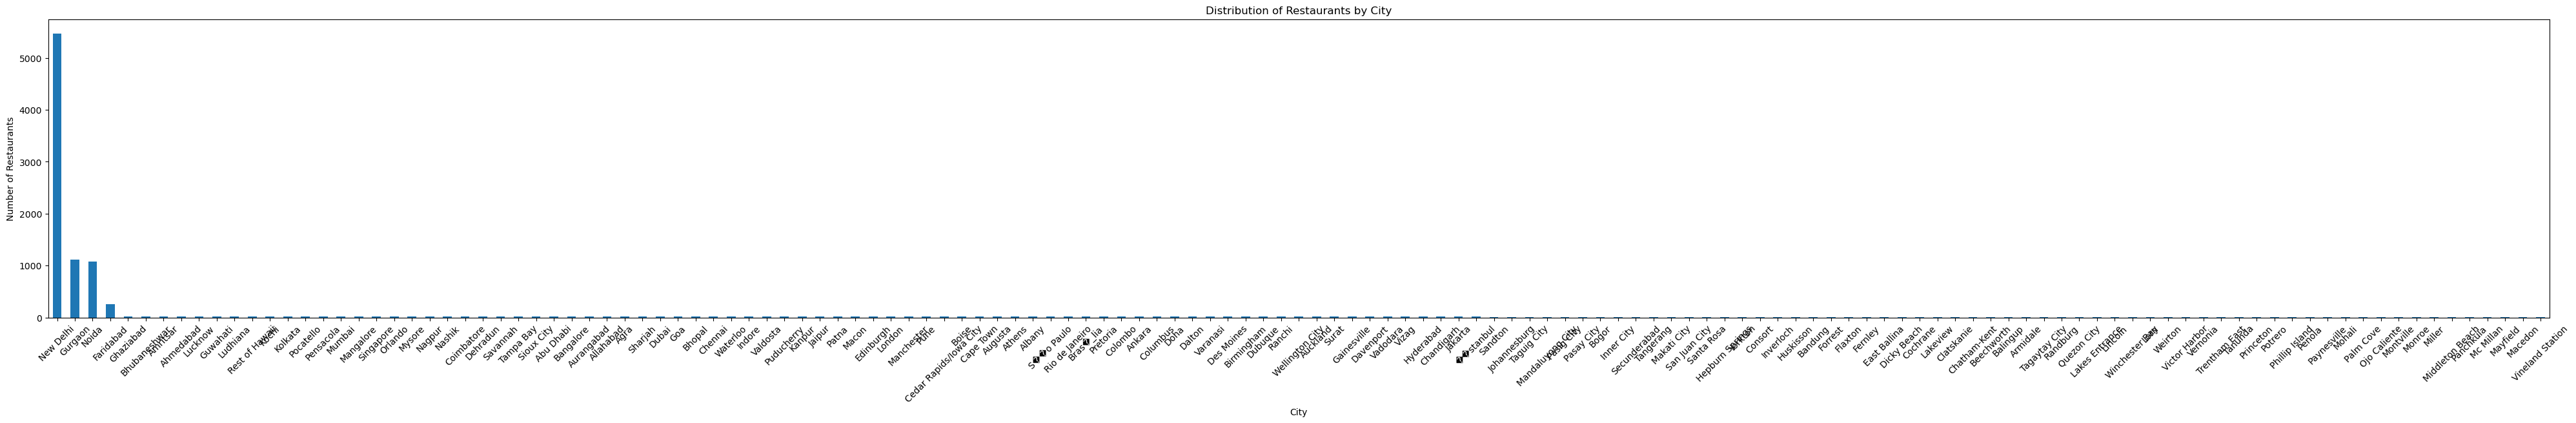

In [35]:
plt.figure(figsize=(50, 6))
data['City'].value_counts().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by City')
plt.xticks(rotation=45)
plt.show()


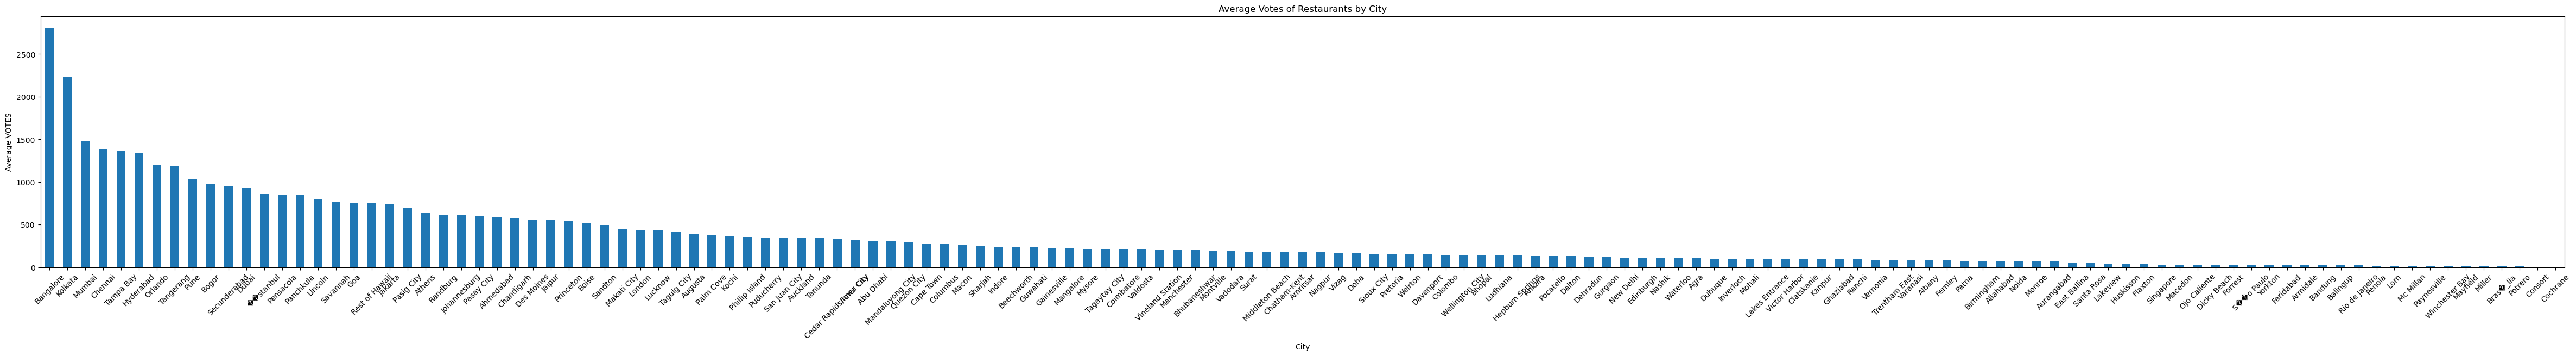

In [40]:
plt.figure(figsize=(60, 6))
avg_ratings_by_city = data.groupby('City')['Votes'].mean().sort_values(ascending=False)
avg_ratings_by_city.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Average VOTES')
plt.title('Average Votes of Restaurants by City')
plt.xticks(rotation=45)
plt.show()


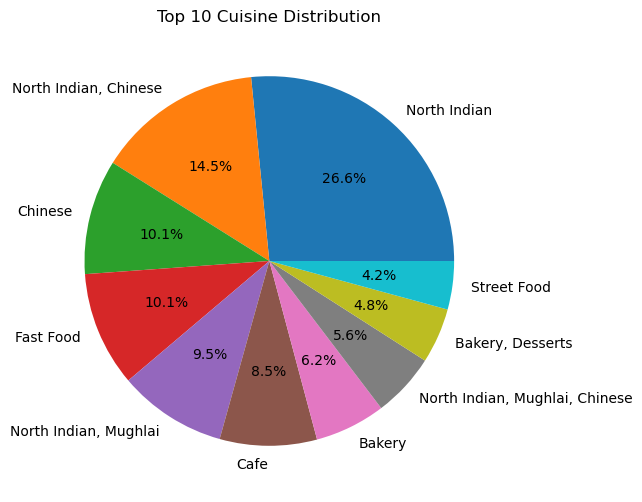

In [42]:
plt.figure(figsize=(10, 6))
cuisine_counts = data['Cuisines'].value_counts().head(10)  # Display top 10 cuisines
cuisine_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Cuisine Distribution')
plt.ylabel('')
plt.show()


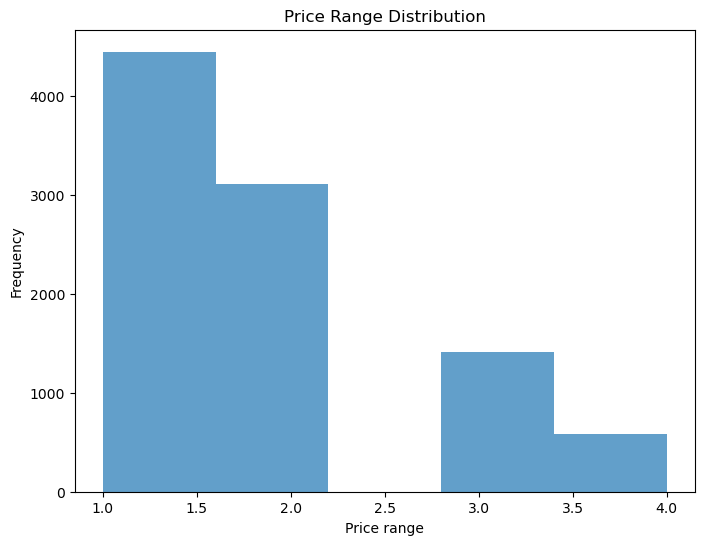

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(data['Price range'], bins=5, alpha=0.7)
plt.xlabel('Price range')
plt.ylabel('Frequency')
plt.title('Price Range Distribution')
plt.show()


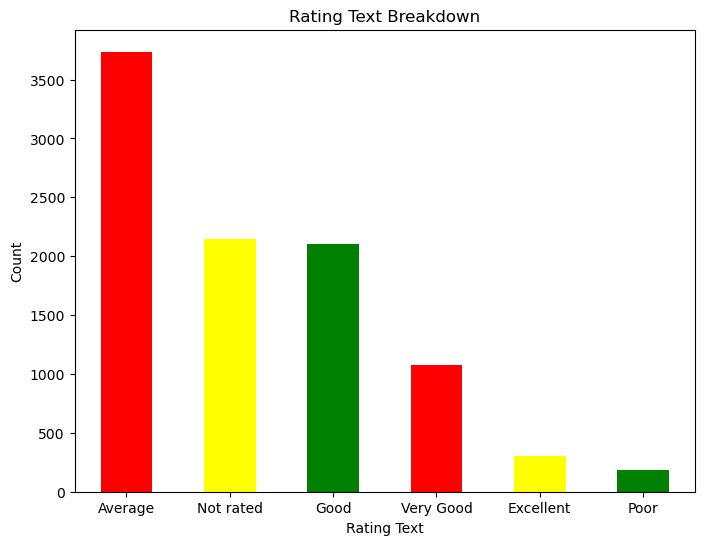

In [48]:
plt.figure(figsize=(8, 6))
rating_color_counts = data['Rating text'].value_counts()
rating_color_counts.plot(kind='bar', color=['red', 'yellow', 'green'])
plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.title('Rating Text Breakdown')
plt.xticks(rotation=0)
plt.show()


In [31]:
# Identify popular cuisines in each city
popular_cuisines = data.groupby(['City', 'Cuisines'])['Restaurant ID'].count().reset_index()
popular_cuisines = popular_cuisines.sort_values(by='Restaurant ID', ascending=False)
print(popular_cuisines.head())


           City               Cuisines  Restaurant ID
2006  New Delhi           North Indian            658
2018  New Delhi  North Indian, Chinese            284
1787  New Delhi              Fast Food            242
1602  New Delhi                Chinese            228
2140  New Delhi  North Indian, Mughlai            207


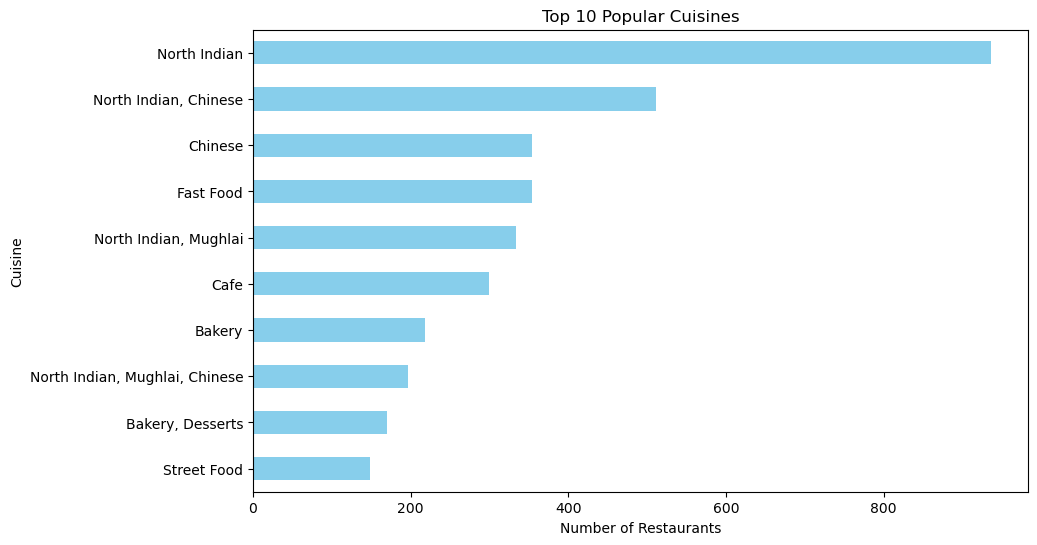

In [49]:
import matplotlib.pyplot as plt

# Assuming 'Cuisine' is the column containing cuisine information in your dataset
top_cuisines = data['Cuisines'].value_counts().head(10)  # Display top 10 cuisines

plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.title('Top 10 Popular Cuisines')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most popular cuisine at the top
plt.show()
